In [1]:
import numpy as np
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
from agent import Agent
from deep_q_learning import dqn

In [2]:
# Initialize the Environment
env = UnityEnvironment(file_name="Banana.app")

# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Get the action size
action_size = brain.vector_action_space_size

# Get the state size
state_size = len(env_info.vector_observations[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
#Initialize the Agent with given hyperparameters

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.999           # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network
seed = 42               # random seed

agent = Agent(state_size=state_size,
              action_size=action_size,
              buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE,
              gamma=GAMMA,
              tau=TAU,
              learning_rate=LR,
              update_every=UPDATE_EVERY,
              seed=seed)

In [4]:
# Train the agent with given epsilon hyperparameters

EPSILON_START = 0.9           #starting value of epsilon, for epsilon-greedy action selection
EPSILON_MIN = 0.01            #minimum value of epsilon
EPSILON_DECAY = 0.9           #epsilon decay factor
EPSILON_DECAY_DELAY = 10      #used to delay the decay of epsilon by a given number of episodes
AVERAGE_SCORE_SOLVED = 13.0   #average score needed (over 100 last episodes) to consider the environment as solved

scores, num_episodes_solved = dqn(env=env,
                                  agent=agent,
                                  average_score_solved=AVERAGE_SCORE_SOLVED,
                                  epsilon_start=EPSILON_START,
                                  epsilon_min=EPSILON_MIN,
                                  epsilon_decay=EPSILON_DECAY,
                                  epsilon_decay_delay=EPSILON_DECAY_DELAY)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Episode 100	Average Score: 0.92
Episode 200	Average Score: 6.00
Episode 300	Average Score: 11.62
Episode 400	Average Score: 12.44
Episode 431	Average Score: 13.14
Environment solved in 331 episodes!	Average Score: 13.14


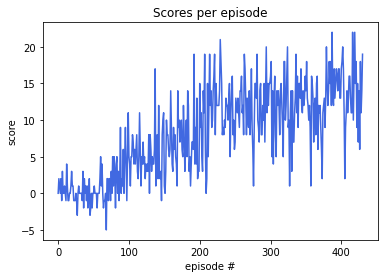

In [5]:
#Plot the training session (scores per episode)

def plot_scores(scores):
    plt.plot(scores, color='royalblue')
    plt.title('Scores per episode')
    plt.ylabel('score')
    plt.xlabel('episode #')
    plt.show()
    
plot_scores(scores)


In [7]:
#See the trained agent in action.

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state

#Uncomment these lines to use a saved checkpoint:
#agent = Agent(state_size=state_size,
#              action_size=action_size,
#              buffer_size=BUFFER_SIZE,
#              batch_size=BATCH_SIZE,
#              gamma=GAMMA,
#              tau=TAU,
#              learning_rate=LR,
#              update_every=UPDATE_EVERY,
#              seed=seed)
#agent.qnetwork_local.load_weights('./checkpoints/qnetwork_local.ckpt')

score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 19.0


In [8]:
env.close()

In [ ]:
# Function to test various hyperparameters (set above) for the Agent, as well as epsilon
def test_hyperparameters(repeat=10):
    average_episodes_solved = 0
    for i in range(repeat):
        scores, num_episodes_solved = dqn(env=env,
                                  agent=agent,
                                  average_score_solved=AVERAGE_SCORE_SOLVED,
                                  epsilon_start=EPSILON_START,
                                  epsilon_min=EPSILON_MIN,
                                  epsilon_decay=EPSILON_DECAY,
                                  epsilon_decay_delay=EPSILON_DECAY_DELAY)
        
        average_episodes_solved += num_episodes_solved
        
    print('\n\nAverage number of episodes to solve: {}'.format(average_episodes_solved/repeat))
    
#test_hyperparameters()